In [1]:
#import data and calculate standard score
import numpy as np
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
features=np.concatenate((x_train,x_test),axis=0).reshape(60000,-1)
labels=np.concatenate((y_train,y_test),axis=0).reshape(1,-1)[0].tolist()
features=features.astype('float')
features -= np.mean(features, axis=0)
features /= np.std(features, axis=0)

Using TensorFlow backend.


In [2]:
print(features.shape)
print(len(labels))

(60000, 3072)
60000


In [0]:
# try grayscale
# aa=features.reshape(-1,3)
# bb=np.apply_along_axis(lambda t:(0.299*t[0]+0.587*t[1]+0.114*t[2]),1,aa)
# features=bb.reshape(60000,-1)

In [0]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
def cal_accurancy(train_features,train_labels,test_features,test_labels):
    clf=KNeighborsClassifier(n_neighbors=14).fit(train_features,train_labels)
    result=clf.predict(test_features)
    n=0
    for i in range(6000):
        confusion[result[i]][test_labels[i]]+=1
        if(result[i]==test_labels[i]):
            n=n+1

    for i in range(10):
        for j in range(6000):
            if(result[j]==i and test_labels[j]==i):
              TP[i]+=1
            if(result[j]==i and test_labels[j]!=i):
              FP[i]+=1
            if(result[j]!=i and test_labels[j]==i):
              FN[i]+=1
            if(result[j]!=i and test_labels[j]!=i):
              TN[i]+=1
    return n/6000

In [0]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=30).fit(features)
features_PCA=pca.transform(features)

In [6]:
#10-fold cross validation
TP=np.zeros(10)
FP=np.zeros(10)
TN=np.zeros(10)
FN=np.zeros(10)
Accuracy=np.zeros(10)
Precision=np.zeros(10)
Recall=np.zeros(10)
F1_Score=np.zeros(10)
confusion=np.zeros((10,10))
acc=[]
for i in range(10):
    train_features=np.concatenate((features_PCA[0:i*6000], features_PCA[(i+1)*6000:]), axis=0)    
    train_labels=labels[0:i*6000]+labels[(i+1)*6000:]
    test_features=features_PCA[i*6000:(i+1)*6000]
    test_labels=labels[i*6000:(i+1)*6000]
    acc.append(cal_accurancy(train_features,train_labels,test_features,test_labels))
    
print(sum(acc)/10)
for i in range(10):
    Accuracy[i]=(TP[i]+TN[i])/(TP[i]+TN[i]+FN[i]+FP[i])
    Precision[i] = TP[i]/(TP[i]+FP[i])
    Recall[i] = TP[i]/(TP[i]+FN[i])
    F1_Score[i] = 2*(Recall[i] * Precision[i]) / (Recall[i] + Precision[i])

0.421


In [7]:
print(Accuracy)
print(Precision)
print(Recall)
print(F1_Score)


[0.88883333 0.91498333 0.84093333 0.88185    0.84028333 0.89625
 0.8534     0.91243333 0.8999     0.91313333]
[0.45594424 0.61291133 0.28964862 0.35231896 0.29574735 0.46654773
 0.35057717 0.6        0.49960866 0.61527209]
[0.57783333 0.40666667 0.40666667 0.2165     0.43233333 0.2615
 0.54666667 0.373      0.63833333 0.3505    ]
[0.50970303 0.48892897 0.33832501 0.26819449 0.35122876 0.33514899
 0.42719458 0.46002055 0.56051515 0.44659163]


In [8]:
confusion

array([[3467.,  496.,  660.,  357.,  401.,  270.,  131.,  383.,  861.,
         578.],
       [ 139., 2440.,   56.,  109.,   49.,   84.,   45.,   88.,  252.,
         719.],
       [ 461.,  248., 2440.,  914., 1333.,  968.,  911.,  676.,  207.,
         266.],
       [  75.,  171.,  262., 1299.,  178.,  807.,  264.,  294.,  159.,
         178.],
       [ 303.,  455., 1146.,  801., 2594.,  791., 1020., 1121.,  226.,
         314.],
       [  66.,   99.,  194.,  708.,  122., 1569.,  146.,  237.,  110.,
         112.],
       [ 238.,  650.,  806., 1250.,  815.,  999., 3280.,  602.,  148.,
         568.],
       [ 107.,  129.,  164.,  237.,  251.,  261.,   77., 2238.,   69.,
         197.],
       [1015.,  786.,  202.,  189.,  206.,  192.,   90.,  191., 3830.,
         965.],
       [ 129.,  526.,   70.,  136.,   51.,   59.,   36.,  170.,  138.,
        2103.]])

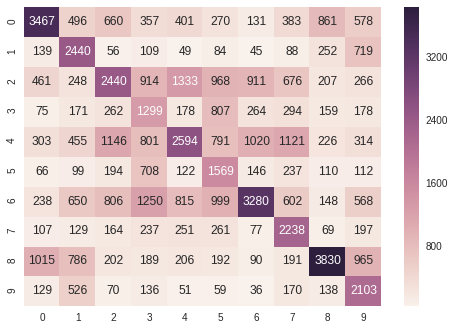

In [9]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confusion, range(10),range(10))
df_cm= df_cm.astype(int)
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True, fmt='d')# font size